<a href="https://colab.research.google.com/github/aryachandrak/Machine-Learning-2024-Ganjil/blob/main/Jobsheet4/Praktikum1_Klasifikasi_SVM_dengan_Data_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

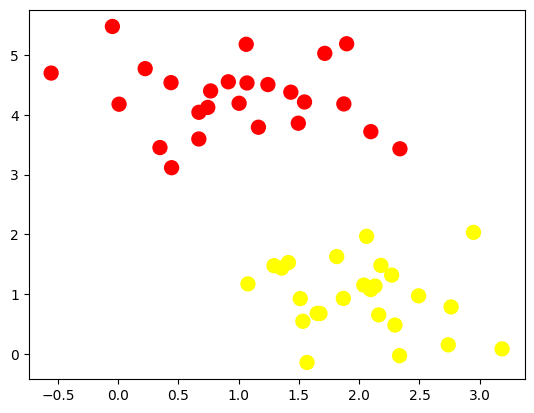

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')

# Penjelasan kode dari baris ke 2
# make_blobs digunakan untuk membuat data sintesis berupa kluster
# n_sample=50 berarti jumlah sample data 50
# centers=2 berarti terdapat 2 kluster
# ramdom_state digunakan agar data akan tetap sama jika dijalankan ulang
# cluster_std=0.60 berarti penyebaran data sekitar 0.6 dari pusat cluster(centroid)

# penjelasan kode dari baris ke 3
# plt.scatter merupakan fungsi dari matplotlib untuk membuat scatter plot
# X[:, 0], X[:, 1] menghasilkan koordinat x dan y
# c=y otomatis mewarnai titik berdasarkan kluster
# s=50 mengatur ukuran titik
# cmap='autumn' mengatur warna yang digunakan

In [4]:
print(X.shape)
print(y.shape)
print("\n")
print(X[:5])
print(y[:5])

# X akan menyimpan koordinat titik data yaitu (x, y)
# y akan menyimpan nilai cluster, disini hanya ada 2 kluster sehingga nilainya hanya akan ada 0 dan 1

(50, 2)
(50,)


[[1.41281595 1.5303347 ]
 [1.81336135 1.6311307 ]
 [1.43289271 4.37679234]
 [1.87271752 4.18069237]
 [2.09517785 1.0791468 ]]
[1 1 0 0 1]


(-1.0, 3.5)

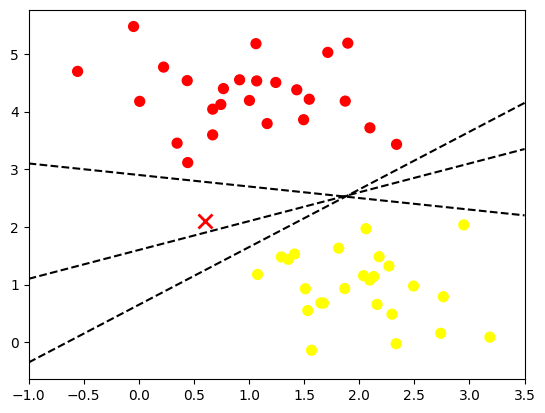

In [17]:
xfit = np.linspace(-1, 3.5, num=10)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '--k')

plt.xlim(-1, 3.5)

#Penjelasan kode baris ke 1
#np.linspace(-1, 3.5) digunakan untuk menentukan 50 titik dari rentang -1 sampai 3.5. jika tidak diberikan parameter num maka nilai defaultnya 50

#Penjelasan kode baris ke 3
# [0.6], [2.1] memberikan koordinat pada satu titik
# 'x' memberikan marker berbentuk x
# color='red' warna marker
# markeredgewidth=2 tebal garis pada marker
# markersize=10 ukuran marker

#Penjelasan baris ke 5
# m berarti kemiringan dan b berarti intersep(titik dimana garis memotong sumbu-y ketika nilai x=0)
# (1, 0.65) berarti m = 1, dan b = 0.65

#Penjelasan baris ke 6
#plt.plot untuk membuat garis
#(x.fit, m*xfit+b) menunjukan koordinat (x, y)
# -k untuk (-) berarti solid line dan k berarti garis berwarna hitam

#Penjelasan baris ke 8
#plt.xlim() mengatur batas sumbu-x dari -1 hingga 3.5, membatasi area yang terlihat pada plot.

In [12]:
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  print(m * xfit + b)

[-0.35  0.15  0.65  1.15  1.65  2.15  2.65  3.15  3.65  4.15]
[1.1  1.35 1.6  1.85 2.1  2.35 2.6  2.85 3.1  3.35]
[3.1 3.  2.9 2.8 2.7 2.6 2.5 2.4 2.3 2.2]
